### Download database do Kaggle

### Carregando Base

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('smartphones.csv')
df.head()

,Smartphone,Brand,Model,RAM,Storage,Color,Free,Final Price
0,Realme C55 8/256GB Sunshower Libre,Realme,C55,8.0,256.0,Yellow,Yes,231.60
1,Samsung Galaxy M23 5G 4/128GB Azul Libre,Samsung,Galaxy M23,4.0,128.0,Blue,Yes,279.00
2,Motorola Moto G13 4/128GB Azul Lavanda Libre,Motorola,Moto G13,4.0,128.0,Blue,Yes,179.01
3,Xiaomi Redmi Note 11S 6/128GB Gris Libre,Xiaomi,Redmi Note 11S,6.0,128.0,Gray,Yes,279.99
4,Nothing Phone (2) 12/512GB Blanco Libre,Nothing,Phone (2),12.0,512.0,White,Yes,799.00


### Sanity Check

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1816 entries, 0 to 1815
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Smartphone   1816 non-null   object 
 1   Brand        1816 non-null   object 
 2   Model        1816 non-null   object 
 3   RAM          1333 non-null   float64
 4   Storage      1791 non-null   float64
 5   Color        1816 non-null   object 
 6   Free         1816 non-null   object 
 7   Final Price  1816 non-null   float64
dtypes: float64(3), object(5)
memory usage: 113.6+ KB


In [4]:
df.isna().sum() * 100 / len(df)

Smartphone      0.000000
Brand           0.000000
Model           0.000000
RAM            26.596916
Storage         1.376652
Color           0.000000
Free            0.000000
Final Price     0.000000
dtype: float64

<p>Base contém nulos, temos 3 opções: </p>
<li>Excluir linhas com nulos</li>
<li>Excluir colunas com nulos</li>
<li>Substituir por alguma medida (média, moda, mediana, etc) </li>
<br>
<p>Seguiremos pelo terceiro modo. Para decidir a melhor medida, teremos que analisar um pouco mais dos dados</p>

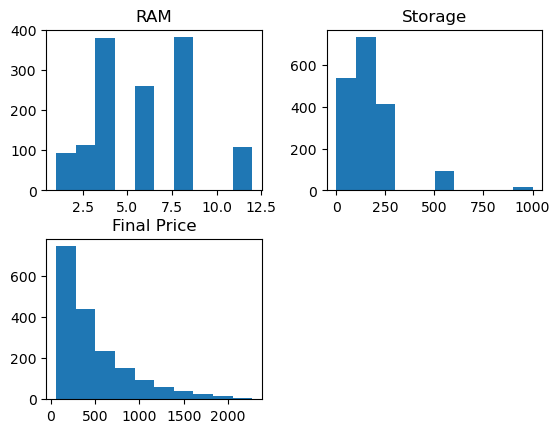

In [5]:
df.hist(grid=False); #observando a distribuição para ver tendência das medidas

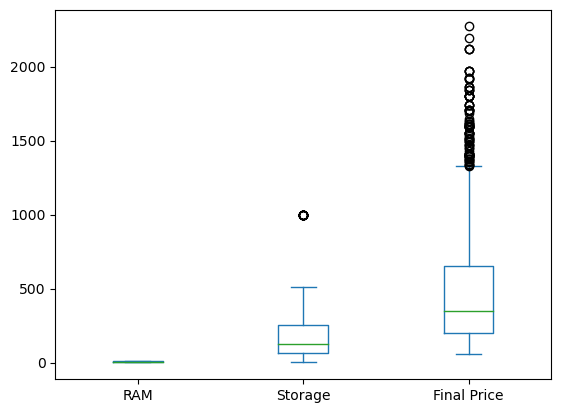

In [6]:
df.plot(kind='box');

<li> A RAM não tem outliers e parece ter dois picos de ocorrências mais frequente. Como não existe RAM com valor quebrado (float), talvez seja valido substituir pela moda </li>

<li> A Storage contém um outlier e parece ser assimétrica a direita. Uma substituição pela mediana pode ser útil </li>

In [7]:
ram_moda = df['RAM'].mode()
storage_median = df['Storage'].median()

In [8]:
df_cleaned = df.copy() #criando cópia para ser meu novo df, representando o df limpo

In [9]:
from sklearn.impute import SimpleImputer

imp_meadian = SimpleImputer(strategy='median')
imp_mode = SimpleImputer(strategy='most_frequent')

imp_meadian.fit(df_cleaned[['Storage']])
imp_mode.fit(df_cleaned[['RAM']])

print(f'RAM: {imp_mode.statistics_}\nStorage: {imp_meadian.statistics_}')

RAM: [8.]
Storage: [128.]


In [10]:
df_cleaned['RAM'].fillna(ram_moda[0], inplace=True)
df_cleaned['Storage'].fillna(storage_median, inplace=True)

In [11]:
df_cleaned.isna().sum()

Smartphone     0
Brand          0
Model          0
RAM            0
Storage        0
Color          0
Free           0
Final Price    0
dtype: int64

### Análise Exploratória

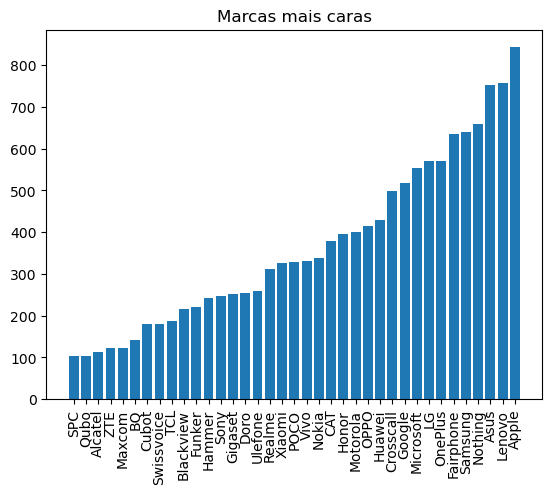

In [12]:
mean_brand = df_cleaned.groupby('Brand')['Final Price'].mean().sort_values()

plt.xticks(rotation=90)
plt.title('Marcas mais caras')
plt.bar(mean_brand.index, mean_brand);

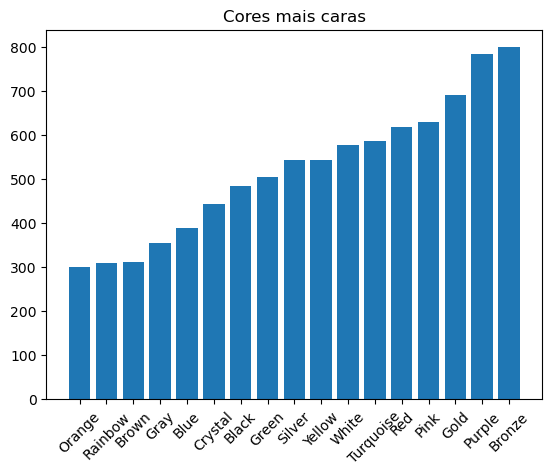

In [13]:
mean_color = df_cleaned.groupby('Color')['Final Price'].mean().sort_values()

plt.xticks(rotation=45)
plt.title('Cores mais caras')
plt.bar(mean_color.index, mean_color);

<p> Existem cores com mais de o dobro de valor do que outras. Isso pode indicar que elas podem influenciar no preço ou pode ser que marcas mais caras usem as cores mais caras </p>

In [14]:
total_por_brand = df_cleaned.groupby('Brand')['Color'].count()
contagem_cores = df_cleaned.groupby('Brand')['Color'].value_counts().reset_index(name='contagem')

contagem_cores = pd.merge(contagem_cores, total_por_brand, on='Brand', suffixes=('_Color', '_total'))
contagem_cores['porcentagem'] = contagem_cores['contagem'] / contagem_cores['Color_total'] * 100
contagem_cores = contagem_cores[['Brand', 'Color_Color', 'porcentagem']]

In [15]:
contagem_cores.groupby('Brand').head(1) #cores mais comuns nas marcas

,Brand,Color_Color,porcentagem
0,Alcatel,Black,42.857143
4,Apple,Black,17.123288
15,Asus,Black,100.000000
16,BQ,Black,100.000000
17,Blackview,Black,51.851852
23,CAT,Black,100.000000
24,Crosscall,Black,85.714286
26,Cubot,Black,52.941176
33,Doro,Pink,33.333333
36,Fairphone,Black,100.000000


In [16]:
contagem_cores[contagem_cores['Color_Color'] == 'Bronze']

,Brand,Color_Color,porcentagem
128,Samsung,Bronze,0.436681
159,Xiaomi,Bronze,0.284900


<p> Aparentemente cor, marca e preço não muito relacionados. Ainda sim, pode haver uma tendência que não analisamos. </p>
<p> Podemos transformar as cores em números atráves do rgb, que podem indicar alguma tendência </p>

In [17]:
cores_rgb = {
    'Orange': (255, 165, 0),
    'Rainbow': (255, 0, 255),
    'Brown': (165, 42, 42),
    'Gray': (128, 128, 128),
    'Blue': (0, 0, 255),
    'Crystal': (0, 255, 255),
    'Black': (0, 0, 0),
    'Green': (0, 128, 0),
    'Silver': (192, 192, 192),
    'Yellow': (255, 255, 0),
    'White': (255, 255, 255),
    'Turquoise': (64, 224, 208),
    'Red': (255, 0, 0),
    'Pink': (255, 192, 203),
    'Gold': (255, 215, 0),
    'Purple': (128, 0, 128),
    'Bronze': (205, 127, 50)
}

def create_rgb(cor, pallet, rgb_index_num):
    return pallet[cor][rgb_index_num]

df_cleaned['r'] = df_cleaned.apply(lambda row: create_rgb(row['Color'], cores_rgb, 0), axis=1)
df_cleaned['g'] = df_cleaned.apply(lambda row: create_rgb(row['Color'], cores_rgb, 1), axis=1)
df_cleaned['b'] = df_cleaned.apply(lambda row: create_rgb(row['Color'], cores_rgb, 2), axis=1)
df_cleaned.head()

,Smartphone,Brand,Model,RAM,Storage,Color,Free,Final Price,r,g,b
0,Realme C55 8/256GB Sunshower Libre,Realme,C55,8.0,256.0,Yellow,Yes,231.60,255,255,0
1,Samsung Galaxy M23 5G 4/128GB Azul Libre,Samsung,Galaxy M23,4.0,128.0,Blue,Yes,279.00,0,0,255
2,Motorola Moto G13 4/128GB Azul Lavanda Libre,Motorola,Moto G13,4.0,128.0,Blue,Yes,179.01,0,0,255
3,Xiaomi Redmi Note 11S 6/128GB Gris Libre,Xiaomi,Redmi Note 11S,6.0,128.0,Gray,Yes,279.99,128,128,128
4,Nothing Phone (2) 12/512GB Blanco Libre,Nothing,Phone (2),12.0,512.0,White,Yes,799.00,255,255,255


C:\Users\yurid\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


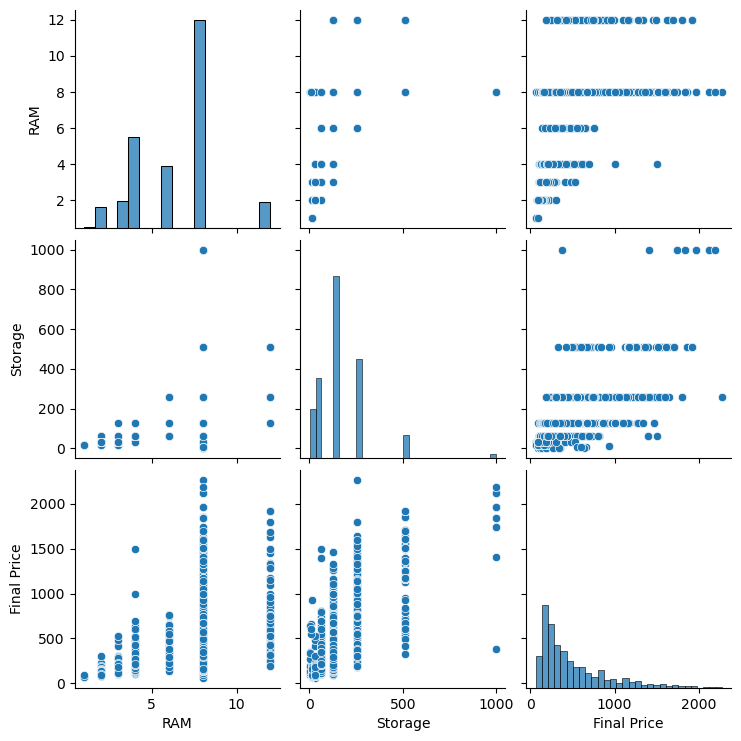

In [18]:
import seaborn as sns

sns.pairplot(df_cleaned[['RAM', 'Storage', 'Final Price']], kind="scatter");

In [19]:
m_corr = df_cleaned[['RAM', 'Storage', 'Final Price', 'r', 'g', 'b']].corr()
m_corr['Final Price']

RAM            0.579126
Storage        0.696851
Final Price    1.000000
r              0.123573
g              0.071071
b             -0.044529
Name: Final Price, dtype: float64

<Axes: >

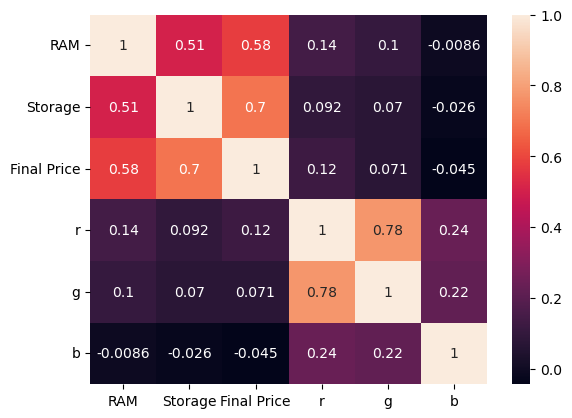

In [20]:
sns.heatmap(m_corr, annot=True)

<p> Preço tem boa correlação com RAM e Storage. Já o RGB parece não influenciar - talvez seja mais valido transformar o atributo de cor em binário com o OneHotEnconder </p>

In [21]:
df_cleaned['Free'].unique()

array(['Yes', 'No'], dtype=object)

In [22]:
from sklearn.preprocessing import OrdinalEncoder

encoder_o = OrdinalEncoder()

df_cleaned['Free_encoded'] = encoder_o.fit_transform(df_cleaned[['Free']])

In [23]:
from sklearn.preprocessing import OneHotEncoder

encoder_h = OneHotEncoder()

cat_encoded = encoder_h.fit_transform(df_cleaned[['Color', 'Brand']])

In [24]:
df_cleaned

,Smartphone,Brand,Model,RAM,Storage,Color,Free,Final Price,r,g,b,Free_encoded
0,Realme C55 8/256GB Sunshower Libre,Realme,C55,8.0,256.0,Yellow,Yes,231.60,255,255,0,1.0
1,Samsung Galaxy M23 5G 4/128GB Azul Libre,Samsung,Galaxy M23,4.0,128.0,Blue,Yes,279.00,0,0,255,1.0
2,Motorola Moto G13 4/128GB Azul Lavanda Libre,Motorola,Moto G13,4.0,128.0,Blue,Yes,179.01,0,0,255,1.0
3,Xiaomi Redmi Note 11S 6/128GB Gris Libre,Xiaomi,Redmi Note 11S,6.0,128.0,Gray,Yes,279.99,128,128,128,1.0
4,Nothing Phone (2) 12/512GB Blanco Libre,Nothing,Phone (2),12.0,512.0,White,Yes,799.00,255,255,255,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1811,Xiaomi Redmi Note 8 4/64GB Azul Libre,Xiaomi,Redmi Note 8,4.0,64.0,Blue,Yes,249.01,0,0,255,1.0
1812,Xiaomi Redmi Note 8T 4/128GB Azul Estelar Libre,Xiaomi,Redmi Note 8T,4.0,128.0,Blue,Yes,200.00,0,0,255,1.0
1813,Xiaomi Redmi Note 9 4/128GB Blanco Libre,Xiaomi,Redmi Note 9,4.0,128.0,White,Yes,269.00,255,255,255,1.0
1814,Xiaomi Redmi Note 9S 4/64GB Dual SIM Gris Libre,Xiaomi,Note 9S,4.0,64.0,Gray,Yes,211.00,128,128,128,1.0


### Modelagem

In [25]:
features = ['Free_encoded', 'RAM', 'Storage']
target = ['Final Price']

In [26]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
model_features = scaler.fit_transform(df_cleaned[features])

In [27]:
final_features = np.hstack((cat_encoded.toarray(), model_features))

In [28]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(final_features, df_cleaned[target], test_size=0.2, random_state=42)

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

y_train = np.ravel(y_train) #1d
model = RandomForestRegressor()

model.fit(x_train, y_train)

RandomForestRegressor()

In [35]:
from sklearn.metrics import r2_score, mean_squared_error , mean_absolute_error

y_pred = model.predict(x_test)
r2 = r2_score(y_test, y_pred)
print(r2)

0.622502493970184


<p> Caso tivessemos colocal "Model" nos atributos a serem analisados, poderiamos obter um r2 de quase 0.8. Mas utilizar o model pode não fazer muito sentido a depender do objetivo do modelo. Nesse caso, queremos tentar prever o preço baseado em quem produz, a cor, ram e memória de disco. Ou seja, características gerias que qualquer celular tem. Adicionar o modelo poderia causar um overfitting a depender do modelo</p>

In [36]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(model, parameters, scoring='neg_mean_squared_error', cv=5)

In [37]:
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [38]:
best_params

{'max_depth': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 200}

In [40]:
from sklearn.model_selection import cross_val_score

clf = RandomForestRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200)
clf.fit(x_train, y_train)

y_test = np.ravel(y_test) #1d

scores = cross_val_score(clf, x_test, y_test, cv=5)

print(f'Mean accuracy: {scores.mean()}\n Std accuracy: {scores.std()}')

Mean accuracy: 0.6228019972253481
 Std accuracy: 0.18457269034818086


O modelo gerado não foi bom. Seria ideal buscar alguma opção, como:
<li>Aumentar a base de dados: temos menos de 2000 registros, o que na verdade é muito pouco</li>
<li>Testar outros modelos: outros modelos podem vim a ser mais robustos e se adptarem melhor as dados</li>
<li>Tratar os dados: criar novas features e/ou utilizar um processo de limpeza diferente e melhor analisado pode ajudar</li>